Tutorial 8: Pipeline
====================

To illustrate lens modeling using an _Inversion_ and _Pipeline_, we'll go back to the complex source model-fit that we
performed in tutorial 3 of chapter 3. This time, as you've probably guessed, we'll fit the complex source using an
_Inversion_.

We'll begin by modeling the source with a _LightProfile_, to initialize the mass model and avoid the unphysical
solutions discussed in tutorial 6. We'll then switch to an _Inversion_.
"""

""" AUTOFIT + CONFIG SETUP 

In [1]:
%matplotlib inline

from autoconf import conf
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

Workspace Path:  /home/carlos/autolens_workspace


Use this path to explicitly set the config path and output path.

In [2]:
conf.instance = conf.Config(
    config_path=f"{workspace_path}/howtolens/config",
    output_path=f"{workspace_path}/howtolens/output",
)

 AUTOLENS + DATA SETUP 

In [4]:
import autolens as al
import autolens.plot as aplt

We'll use strong lensing data, where:

 - The lens galaxy's light is omitted.
 - The lens galaxy's _MassProfile_ is an _EllipticalIsothermal_.
 - The source galaxy's _LightProfile_ is four _EllipticalSersic_'s.

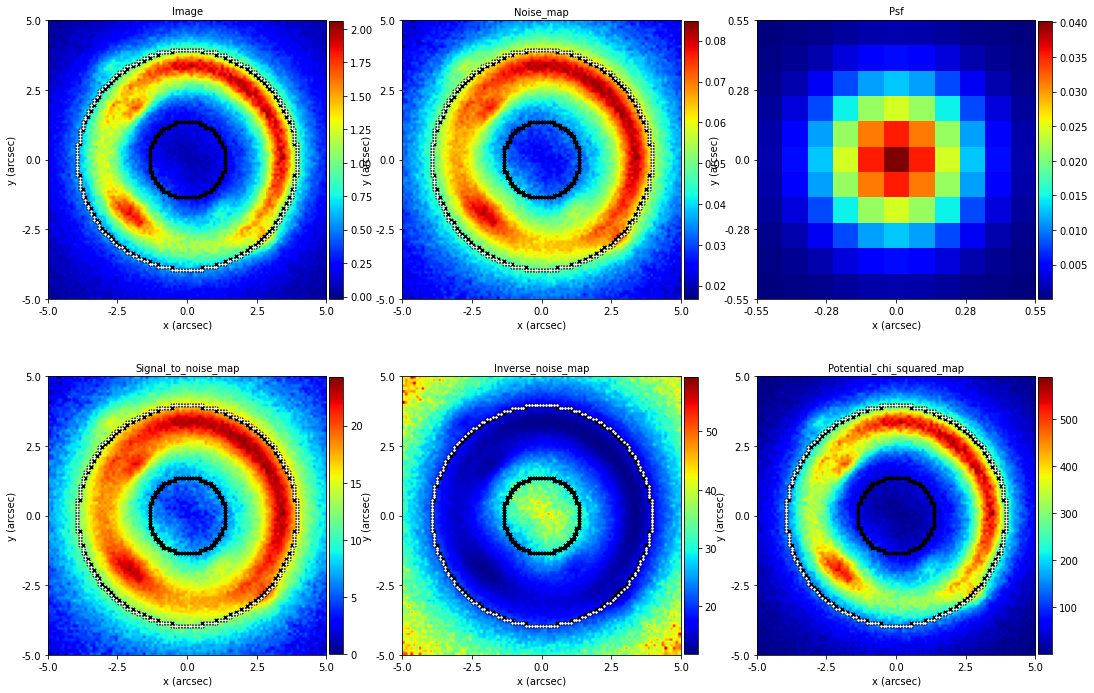

In [5]:
from howtolens.simulators.chapter_4 import lens_sie__source_sersic_x4

dataset_type = "chapter_4"
dataset_name = "lens_sie__source_sersic_x4"
dataset_path = f"{workspace_path}/howtolens/dataset/{dataset_type}/{dataset_name}"

imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/image.fits",
    noise_map_path=f"{dataset_path}/noise_map.fits",
    psf_path=f"{dataset_path}/psf.fits",
    pixel_scales=0.1,
)

mask = al.Mask.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, radius=3.0
)

mask = al.Mask.circular_annular(
    shape_2d=imaging.shape_2d,
    pixel_scales=imaging.pixel_scales,
    inner_radius=1.3,
    outer_radius=4,
)

aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask, include=aplt.Include(border=True))

__Settings__

The *PhaseSettingsImaging* describe how the model is fitted to the data in the log likelihood function. We discussed
these in chapter 2, and a full description of all settings can be found in the example script:

    'autolens_workspace/examples/model/customize/settings.py'.

The settings chosen here are applied to all phases in the pipeline.

In [6]:
settings = al.PhaseSettingsImaging(grid_class=al.Grid, sub_size=2)

__Pipeline_Setup_And_Tagging__:

For this pipeline the pipeline setup customizes and tags:

 - The Pixelization used by the inversion of this pipeline.
 - The Regularization scheme used by of this pipeline.
 - If there is an external shear in the mass model or not.

In [7]:
setup = al.PipelineSetup(
    pixelization=al.pix.VoronoiMagnification,
    regularization=al.reg.Constant,
    no_shear=False,
    folders=["howtolens", "c4_t8_inversion"],
)

__Pipeline Creation__

To create a pipeline we import it from the pipelines folder and run its 'make_pipeline' function, inputting the 
*Setup* and *PhaseSettings* above.

In [2]:
from howtolens.chapter_4_inversions import tutorial_8_pipeline

pipeline_inversion = tutorial_8_pipeline.make_pipeline(setup=setup, settings=settings)

# Uncomment to run.
pipeline_inversion.run(dataset=imaging, mask=mask)

ModuleNotFoundError: No module named 'howtolens.chapter_4_inversions'

And with that, we now have a pipeline to model strong lenses using an inversion! Checkout the example pipeline in
'autolens_workspace/pipelines/examples/inversion_hyper_galaxies_bg_noise.py' for an example of an _Inversion_ pipeline 
that includes the lens light component.